### 선형 회귀(Linear Regression)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
display(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


None

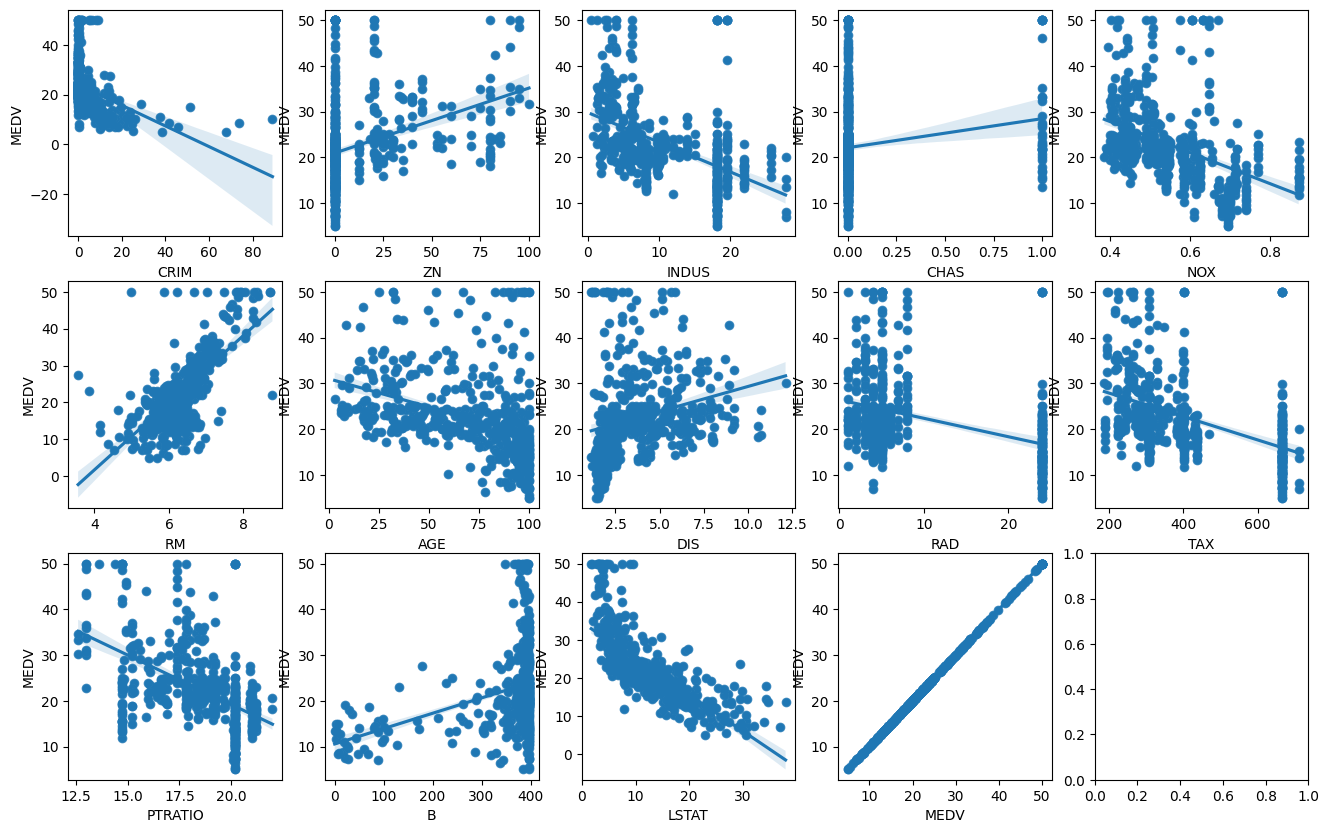

In [7]:
fig, ax = plt.subplots(figsize=(16,10), ncols =5 , nrows =3 )

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

for i , col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    sns.scatterplot(data = boston_df, x = col_name, y='MEDV', ax=ax_temp)

    sns.regplot(data = boston_df, x=col_name, y = 'MEDV', ax=ax_temp)

In [9]:
from sklearn.model_selection import train_test_split

# 입력-라벨 데이터 분리
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']
# 학습 - 테스트 데이터 분할
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)


In [11]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression

#학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 평가 -> score 기본 평가 지표 : R^2 (결정계수)
lr.score(X_train, y_train), lr.score(X_test,y_test)

(0.748087259862344, 0.684426728352709)

In [12]:
y_pred = lr.predict(X_test)

In [14]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MES : {mse}, RMSE: {rmse}, mae : {mae}, R2 : {r2}')
    
evaluate_regression(y_test, y_pred)
    

MES : 22.09869482709827, RMSE: 4.700924890603791, mae : 3.0609395954370795, R2 : 0.684426728352709


In [15]:
coef = lr.coef_ #회귀계수 (특성에 대한 가중치)
intercept = lr.intercept_   # 절편

print(boston_df.columns)
coef,intercept

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383845))

### 다항회귀
- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 기법

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape)
poly.get_feature_names_out()

(379, 13) (379, 104) (127, 13) (127, 104)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [20]:
#학습
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

print(lr_poly.score(X_train_poly,y_train),lr_poly.score(X_test_poly,y_test))

y_pred = lr_poly.predict(X_test_poly)
evaluate_regression(y_test, y_pred)


0.9448313975211595 0.7758378393362159


#### 캘리포니아 집값 예측해보기

In [39]:
# 캘리포니아 집값 데이터 로드
from sklearn.datasets import fetch_california_housing

california_data = fetch_california_housing()
# california_data.keys()
california_data
# print(california_data.feature_names)
# print(california_data.target_names)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [36]:
#Data  프레임 생성 -> 구조 , 기초 통계
california_df = pd.DataFrame(data=california_data,columns=california_data.feature_names)
california_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude


In [ ]:
# 시각화 -> 특성 확인

In [ ]:
# 다중 회귀


In [25]:
# 다횡 회귀
